<a href="https://colab.research.google.com/github/olgabernier/Machine-Learning/blob/master/ML_Exercice_sante_des_indiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow
import pandas as pd
import numpy as np
from  keras import models, layers
from  keras import Sequential
from  keras import utils
from keras.layers import Dense, Input

Using TensorFlow backend.


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header = None)

In [0]:
df.columns = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)','Class variable (0 or 1)']

In [0]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.shape

(768, 9)

In [0]:
X = np.array(df.iloc[: , 0:8], dtype = int)
X.shape
# sinon: df.to_numpy

(768, 8)

In [0]:
y = np.array(df.iloc[:,8], dtype = int)
y.shape

(768,)

In [0]:
keras.backend.clear_session()

In [0]:
model = Sequential()
# Définition de la couche d'entrée (input_shape, 8 variables = 8 colonnes), n de neurones = 64:
model.add(Dense(units=20, activation='relu', input_shape=(8,))) # couche d'entrée (inout_shape) + couche cachée (units = n de neurones)
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) # couche de sortie: units = nombre de neurones, 1 = le nombre de réponse: OUI ou NON, 1 ou 0):


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


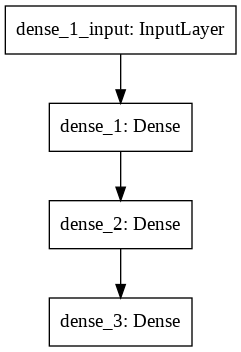

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# Adagrad
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# https://keras.io/models/sequential/
history = model.fit(X, y, epochs=50,validation_split=0.1)

Train on 691 samples, validate on 77 samples
Epoch 1/50
691/691 [==============================] - 0s 71us/step - loss: 0.5291 - acc: 0.7323 - mean_squared_error: 0.1767 - val_loss: 0.6325 - val_acc: 0.6104 - val_mean_squared_error: 0.2187
Epoch 2/50
691/691 [==============================] - 0s 59us/step - loss: 0.5309 - acc: 0.7294 - mean_squared_error: 0.1781 - val_loss: 0.6214 - val_acc: 0.6623 - val_mean_squared_error: 0.2150
Epoch 3/50
691/691 [==============================] - 0s 58us/step - loss: 0.5233 - acc: 0.7366 - mean_squared_error: 0.1744 - val_loss: 0.6439 - val_acc: 0.6364 - val_mean_squared_error: 0.2231
Epoch 4/50
691/691 [==============================] - 0s 57us/step - loss: 0.5288 - acc: 0.7279 - mean_squared_error: 0.1768 - val_loss: 0.6126 - val_acc: 0.6623 - val_mean_squared_error: 0.2103
Epoch 5/50
691/691 [==============================] - 0s 58us/step - loss: 0.5322 - acc: 0.7366 - mean_squared_error: 0.1783 - val_loss: 0.6217 - val_acc: 0.6623 - val_mean_sq

In [0]:
history.history['acc']


[0.6570188126239693,
 0.6570188136590718,
 0.6570188136590718,
 0.657018812882745,
 0.6570188140903644,
 0.657018812882745,
 0.657018813055262,
 0.6570188138315888,
 0.657018813055262,
 0.6570188136159425,
 0.6570188126239693,
 0.6570188126239693,
 0.6584659906268637,
 0.6570188126239693,
 0.6599131694923434,
 0.6700434150813113,
 0.6729377716909096,
 0.6801736611015717,
 0.672937771259617,
 0.6801736611015717,
 0.6917510852972436,
 0.6903039081569345,
 0.6874095521511459,
 0.6960926191334097,
 0.6931982637314307,
 0.6931982641627233,
 0.6859623726818564,
 0.6975397967050113,
 0.6874095518923703,
 0.7047756867194831,
 0.7134587562032443,
 0.719247467611012,
 0.7192474682148217,
 0.7047756879271025,
 0.7149059342061387,
 0.7105643991623533,
 0.717800289349342,
 0.7206946447513211,
 0.7105643997661629,
 0.7235890011884024,
 0.7192474671797193,
 0.716353110742638,
 0.736613602783159,
 0.7279305359734123,
 0.7192474667484267,
 0.7337192482437652,
 0.7264833579705179,
 0.7322720702408709,
 

In [0]:
loss,accuracy, mse = model.evaluate(X, y)
loss,accuracy, mse

768/768 [==============================] - 0s 35us/step


(0.5145116100708643, 0.7395833333333334, 0.1711361175402999)

In [0]:
# A History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values (if applicable).

In [0]:
'''
import json

with open("model.json", "w") as json_file:
    json_file.write(json_model)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
'''



'\n# serialize weights to HDF5\nmodel.save_weights("model.h5")\nprint("Saved model to disk")\n'

In [0]:
import matplotlib.pyplot as plt

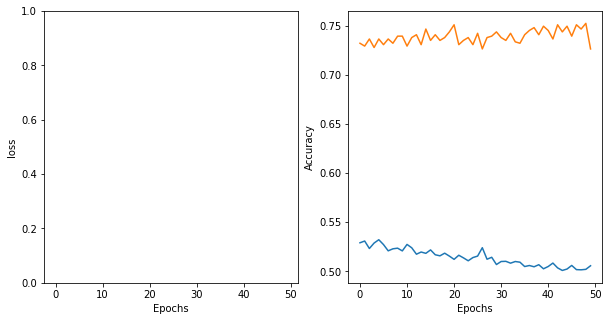

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharex = True)
ax1.plot = plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
ax2.plot = plt.plot(list(range(len(history.history['acc']))), history.history['acc'])
ax1.set(xlabel='Epochs', ylabel='loss')
ax2.set(xlabel='Epochs', ylabel='Accuracy')
plt.show()

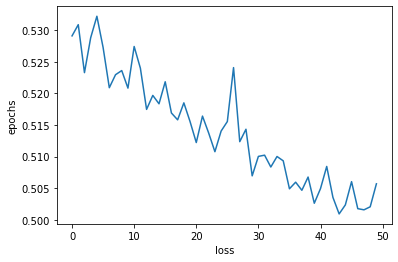

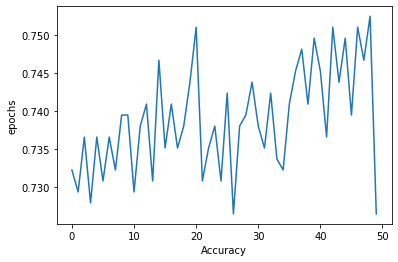

In [0]:
plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()
plt.plot(list(range(len(history.history['acc']))), history.history['acc'])
plt.ylabel('epochs')
plt.xlabel('Accuracy')
plt.show()
